# Payment Date Prediction 


### Importing related Libraries 

In [11]:
import pandas as pd
import numpy as np
from datetime import datetime
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


### Store the dataset into the Dataframe


In [12]:
data = pd.read_csv('dataset.csv')
df = pd.DataFrame(data)

### Check the shape of the dataframe


In [13]:
df.shape

(50000, 19)

### Check the Detail information of the dataframe

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [15]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [16]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [17]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [18]:
df.isnull().sum() * 100 / len(df)

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [19]:
df[['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [20]:
df[['baseline_create_date', 'document_create_date','document_create_date.1']]

,baseline_create_date,document_create_date,document_create_date.1
0,20200126.0,20200125,20200126
1,20190722.0,20190722,20190722
2,20190914.0,20190914,20190914
3,20200331.0,20200330,20200330
4,20191113.0,20191113,20191113
...,...,...,...
49995,20200421.0,20200417,20200421
49996,20190815.0,20190814,20190815
49997,20200219.0,20200218,20200219
49998,20191127.0,20191126,20191127


#### Please check, Column 'posting_id' is constant columns or not


In [21]:
df['posting_id'].nunique()

1

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [22]:
df['isOpen'].nunique()

2

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [23]:
df.drop(['area_business','posting_id','invoice_id', 'document_create_date', 'isOpen', 'document type', 'document_create_date.1'],axis='columns', inplace=True)



### Please check from the dataframe whether all the columns are removed or not 

In [24]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

### Show all the Duplicate rows from the dataframe

In [25]:
df.loc[df.duplicated(), :]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


### Display the Number of Duplicate Rows

In [26]:
df.duplicated().sum()

1161

### Drop all the Duplicate Rows

In [27]:
df.drop_duplicates(keep= False, inplace = True)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [28]:
df.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [29]:
df.shape

(47692, 12)

### Find out the total count of null values in each columns

In [30]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9367
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [31]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [32]:
df[['clear_date', 'posting_date','due_in_date', 'baseline_create_date']].dtypes

clear_date               object
posting_date             object
due_in_date             float64
baseline_create_date    float64
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [33]:
df['clear_date']=pd.to_datetime(df['clear_date']).dt.normalize()
df['posting_date']=pd.to_datetime(df['posting_date']).dt.normalize()
df['due_in_date']=pd.to_datetime(df['due_in_date'], format = "%Y%m%d")
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'], format = "%Y%m%d")

### Please check the datatype of all the columns after conversion of the above 4 columns

In [34]:
df[['clear_date', 'posting_date','due_in_date', 'baseline_create_date']].dtypes

clear_date              datetime64[ns]
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
baseline_create_date    datetime64[ns]
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [35]:
df.invoice_currency.value_counts()

USD    43953
CAD     3739
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [36]:
df.total_open_amount

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: total_open_amount, Length: 47692, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [37]:
df['converted_usd'] = np.where((df['invoice_currency'] == "CAD")&(df['buisness_year']==2019), df['total_open_amount']*0.7, df['total_open_amount'])
df['converted_usd'] = np.where((df['invoice_currency'] == "CAD")&(df['buisness_year']==2020), df['total_open_amount']*0.7, df['total_open_amount'])

### Display the new "converted_usd" column values

In [38]:
df.converted_usd

0        54273.28
1        79656.60
2         2253.86
3         2309.79
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: converted_usd, Length: 47692, dtype: float64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [39]:
df.sort_values("buisness_year", axis = 0, ascending = True, inplace = True, na_position ='first')
df.buisness_year

49999    2019.0
42482    2019.0
24985    2019.0
24984    2019.0
42483    2019.0
          ...  
25646    2020.0
25643    2020.0
25638    2020.0
25665    2020.0
24994    2020.0
Name: buisness_year, Length: 47692, dtype: float64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [40]:
df.drop(['invoice_currency','total_open_amount'], axis='columns', inplace=True)

### Write a code to check the number of columns in dataframe

In [41]:
len(df.columns)

11

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [42]:
columns_with_null = df.columns[df.isna().any()].tolist()
columns_with_null

['clear_date']

#### Find out the number of null values from the column that you got from the above code

In [43]:
df.clear_date.isnull().sum()

9367

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [44]:
maindata = df[df.clear_date.isnull() == False] 
nulldata = df[df.clear_date.isnull()]

### Check the number of Rows and Columns for both the dataframes 

In [45]:
maindata.shape

(38325, 11)

In [46]:
nulldata.shape

(9367, 11)

### Display the 5 records from maindata and nulldata dataframes

In [47]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
49999,U001,0200020431,DEC corp,2019-01-15,2019.0,1.928576e+09,2019-01-05,2019-01-24,2019-01-01,NAM4,1790.30
42482,U001,0200772670,ASSOCIAT corporation,2019-04-23,2019.0,1.929116e+09,2019-04-09,2019-04-24,2019-04-09,NAU5,6790.77
24985,U001,0200762301,C&S WH llc,2019-04-26,2019.0,1.929120e+09,2019-04-12,2019-04-27,2019-04-12,NAC6,95298.16
24984,U001,0200769623,WAL-MAR llc,2019-09-11,2019.0,1.929817e+09,2019-09-01,2019-09-16,2019-09-01,NAH4,22480.23
42483,U001,0200769623,WAL-MAR co,2019-11-18,2019.0,1.930100e+09,2019-11-06,2019-11-21,2019-11-06,NAH4,25844.81


In [48]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
41439,U001,0200020431,DEC co,NaT,2020.0,1.930682e+09,2020-03-21,2020-04-08,2020-03-16,NAM4,3339.98
40208,U001,0140142846,MONDE in,NaT,2020.0,1.930585e+09,2020-03-04,2020-05-03,2020-03-04,NACB,4590.37
40557,U001,0200744019,TARG llc,NaT,2020.0,1.930701e+09,2020-03-27,2020-04-11,2020-03-27,NAA8,9968.80
47215,U001,0200424504,M co,NaT,2020.0,1.930861e+09,2020-05-06,2020-05-15,2020-05-15,NACH,955.63
44797,U001,0200782669,SYGMA systems,NaT,2020.0,1.930679e+09,2020-03-20,2020-04-09,2020-03-20,NAD1,34667.72


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [49]:
maindata['Delay'] =maindata['clear_date']- maindata['due_in_date']

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [50]:
avg_delay = maindata.groupby('name_customer')['Delay'].mean(numeric_only=False)
avg_delay

name_customer
11078 us                 17 days 00:00:00
17135 associates       -10 days +00:00:00
17135 llc               -3 days +00:00:00
236008 associates       -3 days +00:00:00
99 CE                     2 days 00:00:00
                              ...        
YEN BROS corp             0 days 00:00:00
YEN BROS corporation    -1 days +12:00:00
YEN BROS llc            -2 days +00:00:00
ZARCO co                -1 days +00:00:00
ZIYAD  us                 6 days 00:00:00
Name: Delay, Length: 3856, dtype: timedelta64[ns]

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [51]:
maindata['avg_delay'] = maindata['name_customer'].map(avg_delay)
maindata['avg_delay']

49999   -4 days +03:41:32.307692308
42482     1 days 03:43:05.915492957
24985               0 days 02:13:20
24984   -3 days +09:10:13.784764208
42483   -3 days +13:02:45.617433415
                    ...            
25690   -3 days +13:02:45.617433415
25663   -2 days +16:20:41.379310345
25655   -5 days +12:11:04.615384616
25647     0 days 03:44:15.737704918
25638     0 days 23:18:15.652173913
Name: avg_delay, Length: 38325, dtype: timedelta64[ns]

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [52]:
maindata['avg_delay'] = pd.to_timedelta(maindata['avg_delay']).dt.total_seconds()
maindata['avg_delay']

49999   -332307.692308
42482     99785.915493
24985      8000.000000
24984   -226186.215236
42483   -212234.382567
             ...      
25690   -212234.382567
25663   -113958.620690
25655   -388135.384615
25647     13455.737705
25638     83895.652174
Name: avg_delay, Length: 38325, dtype: float64

### Display the maindata dataframe 

In [53]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
49999,U001,0200020431,DEC corp,2019-01-15,2019.0,1.928576e+09,2019-01-05,2019-01-24,2019-01-01,NAM4,1790.30,-9 days,-332307.692308
42482,U001,0200772670,ASSOCIAT corporation,2019-04-23,2019.0,1.929116e+09,2019-04-09,2019-04-24,2019-04-09,NAU5,6790.77,-1 days,99785.915493
24985,U001,0200762301,C&S WH llc,2019-04-26,2019.0,1.929120e+09,2019-04-12,2019-04-27,2019-04-12,NAC6,95298.16,-1 days,8000.000000
24984,U001,0200769623,WAL-MAR llc,2019-09-11,2019.0,1.929817e+09,2019-09-01,2019-09-16,2019-09-01,NAH4,22480.23,-5 days,-226186.215236
42483,U001,0200769623,WAL-MAR co,2019-11-18,2019.0,1.930100e+09,2019-11-06,2019-11-21,2019-11-06,NAH4,25844.81,-3 days,-212234.382567
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25690,U001,0200769623,WAL-MAR co,2020-02-14,2020.0,1.930470e+09,2020-02-04,2020-02-19,2020-02-04,NAH4,23129.59,-5 days,-212234.382567
25663,U001,0200762301,C&S WH systems,2020-01-27,2020.0,1.930378e+09,2020-01-10,2020-01-25,2020-01-10,NAC6,14880.43,2 days,-113958.620690
25655,U001,0200353024,DECA systems,2020-01-27,2020.0,1.930436e+09,2020-01-24,2020-01-26,2020-01-16,NAM2,3766.19,1 days,-388135.384615
25647,U001,0200759878,SA llc,2020-02-20,2020.0,1.930475e+09,2020-02-05,2020-02-20,2020-02-05,NAH4,97921.91,0 days,13455.737705


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [54]:
maindata.drop(['Delay', 'clear_date'], axis=1, inplace=True)

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [55]:
X = maindata.drop('avg_delay', axis=1)

In [56]:
Y = maindata['avg_delay']

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [57]:
train_len = int(X.shape[0] * 0.6)
X_train = X.iloc[:train_len]
X_loc_test = X.iloc[train_len:]
Y_train = Y.iloc[:train_len]
Y_loc_test = Y.iloc[train_len:]

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [58]:
print(X_train.shape)
print(X_loc_test.shape)
print(Y_train.shape)
print(Y_loc_test.shape)

(22995, 10)
(15330, 10)
(22995,)
(15330,)


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [59]:
test_len = int(X_loc_test.shape[0] * 0.5)

X_val = X_loc_test.iloc[:test_len,:]
X_test = X_loc_test.iloc[test_len:,:]

Y_val = Y_loc_test.iloc[:test_len]
Y_test = Y_loc_test.iloc[test_len:]

### Please check for the number of rows and columns of all the 4 dataframes 

In [60]:
print(X_val.shape)
print(X_test.shape)
print(Y_val.shape)
print(Y_test.shape)

(7665, 10)
(7665, 10)
(7665,)
(7665,)


# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

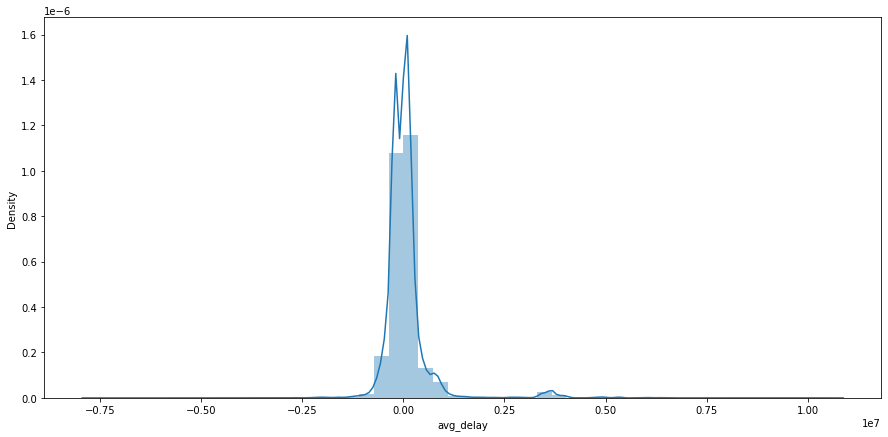

In [61]:
plt.subplots(figsize=(15,7))
sns.distplot(Y)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [62]:
new_df=X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()
new_df

,name_customer,doc_id
0,11078 us,1
1,99 CE associates,1
2,99 CE co,1
3,99 CE corporation,2
4,99 CE foundation,3
...,...,...
3078,YEN BROS,1
3079,YEN BROS co,1
3080,YEN BROS corporation,2
3081,YEN BROS llc,1


### You can make another distribution plot of the "doc_id" column from x_train

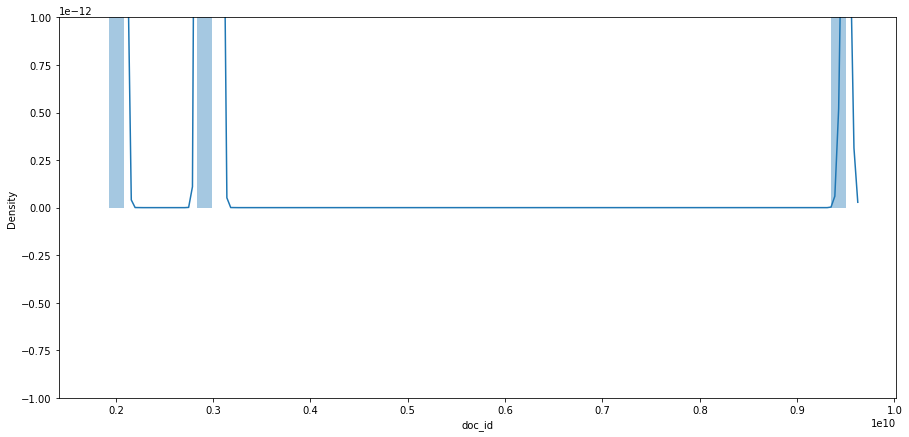

In [63]:
plt.subplots(figsize=(15,7))
sns.distplot(X_train['doc_id'],kde=True)

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


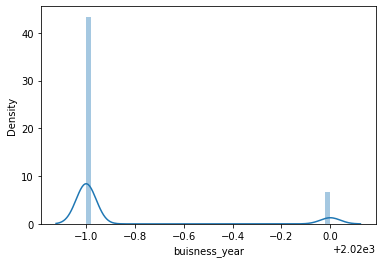

In [64]:
sns.distplot(X['buisness_year'])

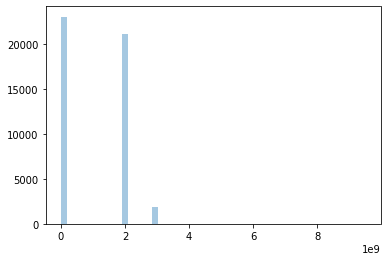

In [65]:
sns.distplot(X_train[["buisness_year","doc_id"]],kde=False)

# Feature Engineering 

### Display and describe the X_train dataframe 

In [66]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
49999,U001,0200020431,DEC corp,2019.0,1.928576e+09,2019-01-05,2019-01-24,2019-01-01,NAM4,1790.30
42482,U001,0200772670,ASSOCIAT corporation,2019.0,1.929116e+09,2019-04-09,2019-04-24,2019-04-09,NAU5,6790.77
24985,U001,0200762301,C&S WH llc,2019.0,1.929120e+09,2019-04-12,2019-04-27,2019-04-12,NAC6,95298.16
24984,U001,0200769623,WAL-MAR llc,2019.0,1.929817e+09,2019-09-01,2019-09-16,2019-09-01,NAH4,22480.23
42483,U001,0200769623,WAL-MAR co,2019.0,1.930100e+09,2019-11-06,2019-11-21,2019-11-06,NAH4,25844.81
...,...,...,...,...,...,...,...,...,...,...
49818,U001,CCCA02,KRAFT in,2019.0,1.929852e+09,2019-09-10,2019-10-15,2019-09-10,NAG2,7692.48
565,U001,0200729942,SA trust,2019.0,1.930140e+09,2019-11-11,2019-11-26,2019-11-11,NAA8,778.40
580,U001,CCCA02,KRAFT in,2019.0,1.930042e+09,2019-10-24,2019-11-28,2019-10-24,NAG2,13108.50
564,U001,0200759082,INGL corp,2019.0,1.928968e+09,2019-03-15,2019-03-30,2019-03-15,NAA8,71693.24


In [67]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,22995.0,2.299500e+04,22995.000000
mean,2019.0,2.016142e+09,32146.546347
std,0.0,3.063105e+08,40311.209893
min,2019.0,1.928502e+09,4.380000
25%,2019.0,1.929093e+09,4689.855000
50%,2019.0,1.929613e+09,17178.840000
75%,2019.0,1.930021e+09,46207.470000
max,2019.0,9.500000e+09,668593.360000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [68]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train["business_code"])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [69]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [70]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [71]:
X_train[['business_code','business_code_enc']]

,business_code,business_code_enc
49999,U001,1
42482,U001,1
24985,U001,1
24984,U001,1
42483,U001,1
...,...,...
49818,U001,1
565,U001,1
580,U001,1
564,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [72]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [73]:
X_train,X_val, X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [74]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [75]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [76]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [77]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [78]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [79]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [80]:
X_train.dtypes

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [81]:
X_val.dtypes

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [82]:
X_test.dtypes

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [83]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [84]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [85]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year


X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [86]:
X_train, X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [87]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [88]:
X_train, X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [89]:
X_train.dtypes
X_val.dtypes
X_test.dtypes

cust_number                 int64
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [90]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

15

- Note - Keep the code as it is, no need to change 


In [91]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

1


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [92]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [93]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [94]:
train=X_train.copy()
handling_correlation(train.copy(),0.85)

['day_of_createdate',
 'year_of_createdate',
 'month_of_createdate',
 'month_of_due']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

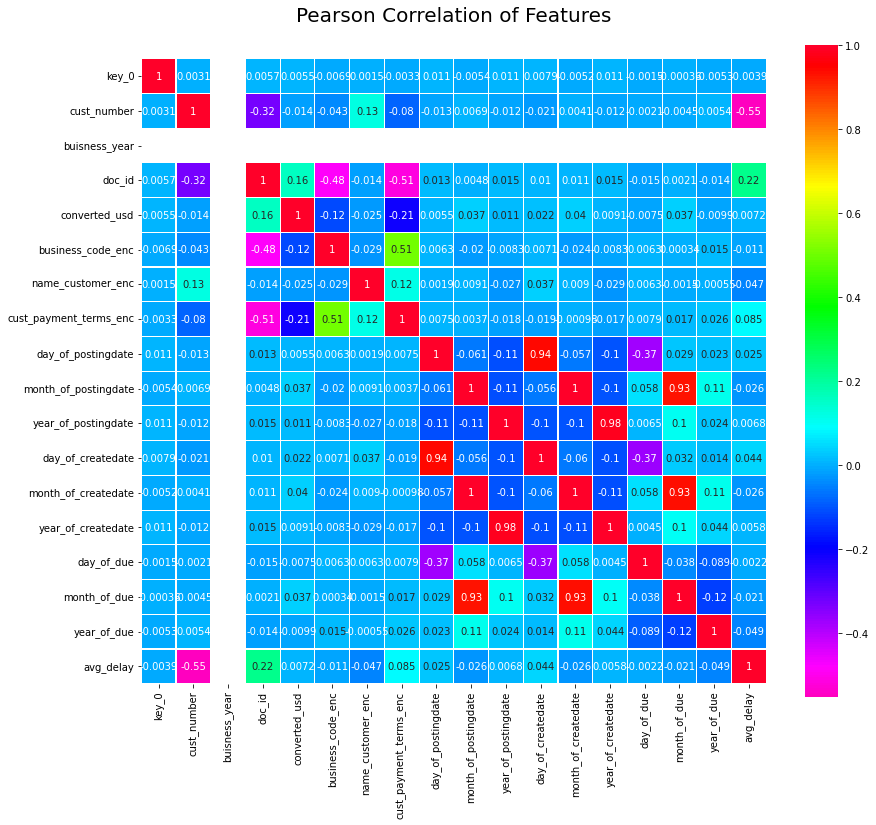

In [95]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(Y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [96]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [97]:
sel.variances_

array([1.78856409e+15, 0.00000000e+00, 9.38220435e+16, 1.62492298e+09,
       2.90755562e-01, 1.06432965e+06, 1.34725120e+02, 7.59420171e+01,
       1.09172799e+01, 3.81227359e-03, 7.76357308e+01, 1.09325613e+01,
       3.85542656e-03, 7.65099469e+01, 1.08795117e+01, 4.89326149e-03])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [98]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [99]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [100]:
MSE_Score.append(mean_squared_error(Y_test, predicted))
R2_Score.append(r2_score(Y_test, predicted))

### Check the same for the Validation set also 

In [101]:
predict_test= regressor.predict(X_val)
mean_squared_error(Y_val, predict_test, squared=False)

534926.8063461704

### Display The Comparison Lists

In [102]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[358076513768.84955],[0.19305478632485484],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [103]:
from sklearn.svm import SVR
Algorithm.append('Support Vector Regression')
df = SVR()
df.fit(X_train, Y_train)
predicted = df.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [104]:
MSE_Score.append(mean_squared_error(Y_test, predicted))
R2_Score.append(r2_score(Y_test, predicted))

### Check the same for the Validation set also 

In [105]:
predict_test= df.predict(X_val)
mean_squared_error(Y_val, predict_test, squared=False)

634791.3782537436

### Display The Comparison Lists

In [106]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression'],[358076513768.84955, 445921436780.21826],[0.19305478632485484, -0.004908602626828573],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [107]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('Decision Tree Regressor')
df = DecisionTreeRegressor()
df.fit(X_train, Y_train)
predicted = df.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [108]:
MSE_Score.append(mean_squared_error(Y_test, predicted))
R2_Score.append(r2_score(Y_test, predicted))

### Check the same for the Validation set also 

In [109]:
predict_test= df.predict(X_val)
mean_squared_error(Y_val, predict_test, squared=False)

422260.6025430852

### Display The Comparison Lists

In [110]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor'],[358076513768.84955, 445921436780.21826, 338336863740.34076],[0.19305478632485484, -0.004908602626828573, 0.2375391786198776],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [111]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regressor')
df = RandomForestRegressor()
df.fit(X_train, Y_train)
predicted = df.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [112]:
MSE_Score.append(mean_squared_error(Y_test, predicted))
R2_Score.append(r2_score(Y_test, predicted))

### Check the same for the Validation set also 

In [113]:
predict_test= df.predict(X_val)
mean_squared_error(Y_val, predict_test, squared=False)

341984.20974881307

### Display The Comparison Lists


In [114]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor', 'Random Forest Regressor'],[358076513768.84955, 445921436780.21826, 338336863740.34076, 129107730091.0336],[0.19305478632485484, -0.004908602626828573, 0.2375391786198776, 0.7090485948132426],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [115]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, Y_train)
predicted = regressor.predict(X_test)

[10:56:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [116]:
MSE_Score.append(mean_squared_error(Y_test, predicted))
R2_Score.append(r2_score(Y_test, predicted))

### Check the same for the Validation set also 

In [117]:
predict_test= df.predict(X_val)
mean_squared_error(Y_val, predict_test, squared=False)

341984.20974881307

### Display The Comparison Lists


In [118]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGB Regressor'],[358076513768.84955, 445921436780.21826, 338336863740.34076, 129107730091.0336, 192208002978.3473],[0.19305478632485484, -0.004908602626828573, 0.2375391786198776, 0.7090485948132426, 0.5668486424843867],

## You need to make the comparison list into a comparison dataframe 

In [119]:
pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,3.580765e+11,0.193055
1,Support Vector Regression,4.459214e+11,-0.004909
2,Decision Tree Regressor,3.383369e+11,0.237539
3,Random Forest Regressor,1.291077e+11,0.709049
4,XGB Regressor,1.922080e+11,0.566849


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [120]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, Y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

[10:56:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [121]:
mean_squared_error(Y_test,predictedfinal,squared=False)

438415.33159590495

### Calculate the mean Square Error for validation dataset

In [122]:
mean_squared_error(Y_val,predict_testfinal,squared=False)

386076.26399463974

### Calculate the R2 score for test

In [123]:
r2_score(Y_test, predictedfinal)

0.5668486424843867

### Calculate the R2 score for Validation

In [124]:
r2_score(Y_val, predictedfinal)

-0.6920494238122472

### Calculate the Accuracy for train Dataset 

In [125]:
print((regressorfinal.score(X_train,Y_train))*100)

72.39534829507386


### Calculate the accuracy for validation

In [126]:
print((r2_score(Y_val,predict_testfinal))*100)

62.860653354464915


### Calculate the accuracy for test

In [127]:
print((r2_score(Y_test,predict_testfinal))*100)

-51.95690015722554


## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [128]:
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
41439,U001,0200020431,DEC co,NaT,2020.0,1.930682e+09,2020-03-21,2020-04-08,2020-03-16,NAM4,3339.98
40208,U001,0140142846,MONDE in,NaT,2020.0,1.930585e+09,2020-03-04,2020-05-03,2020-03-04,NACB,4590.37
40557,U001,0200744019,TARG llc,NaT,2020.0,1.930701e+09,2020-03-27,2020-04-11,2020-03-27,NAA8,9968.80
47215,U001,0200424504,M co,NaT,2020.0,1.930861e+09,2020-05-06,2020-05-15,2020-05-15,NACH,955.63
44797,U001,0200782669,SYGMA systems,NaT,2020.0,1.930679e+09,2020-03-20,2020-04-09,2020-03-20,NAD1,34667.72
...,...,...,...,...,...,...,...,...,...,...,...
25662,U001,0200794332,COST trust,NaT,2020.0,1.930830e+09,2020-04-27,2020-05-17,2020-04-27,NA84,28521.80
25646,U001,0200803720,DEC us,NaT,2020.0,1.930773e+09,2020-04-10,2020-04-24,2020-04-01,NAM4,4466.22
25643,U001,0200705742,DOT co,NaT,2020.0,1.930675e+09,2020-03-20,2020-04-09,2020-03-20,NAD1,13638.72
25665,U001,0200706844,WINC corporation,NaT,2020.0,1.930573e+09,2020-02-28,2020-03-14,2020-02-28,NAA8,41578.28


### Check for the number of rows and columns in the nulldata

In [129]:
nulldata.shape

(9367, 11)

### Check the Description and Information of the nulldata 

In [130]:
nulldata.describe()

,buisness_year,doc_id,converted_usd
count,9367.0,9.367000e+03,9367.000000
mean,2020.0,2.005149e+09,32037.953968
std,0.0,2.657007e+08,35393.410016
min,2020.0,1.930535e+09,0.720000
25%,2020.0,1.930658e+09,5612.600000
50%,2020.0,1.930731e+09,19046.800000
75%,2020.0,1.930818e+09,47641.455000
max,2020.0,2.960636e+09,653644.800000


### Storing the Nulldata into a different dataset 
# for BACKUP

In [131]:
nulldata1= nulldata.copy()

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [132]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [133]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [134]:
nulldata['day_of_cleardate'] = nulldata ['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata ['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata ['clear_date'].dt.year

nulldata['day_of_postingdate'] =nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

nulldata['day_of_due'] = nulldata ['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata ['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata ['due_in_date'].dt.year

nulldata['day_of_createdate'] = nulldata ['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata ['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata ['baseline_create_date'].dt.year

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [135]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [136]:
nulldata.dtypes

business_code                     object
cust_number                        int64
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int64
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
cust_payment_ter

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [137]:
nulldata = nulldata.drop(['business_code', 'baseline_create_date', 'due_in_date', 'posting_date', 'name_customer', 'clear_date', 'cust_payment_terms', 'day_of_cleardate', 
              'month_of_cleardate', 'year_of_cleardate'], axis=1)

### Check the information of the "nulldata" dataframe

In [138]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 41439 to 24994
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9367 non-null   int64  
 1   buisness_year           9367 non-null   float64
 2   doc_id                  9367 non-null   float64
 3   converted_usd           9367 non-null   float64
 4   business_code_enc       9367 non-null   int64  
 5   day_of_postingdate      9367 non-null   int64  
 6   month_of_postingdate    9367 non-null   int64  
 7   year_of_postingdate     9367 non-null   int64  
 8   day_of_due              9367 non-null   int64  
 9   month_of_due            9367 non-null   int64  
 10  year_of_due             9367 non-null   int64  
 11  day_of_createdate       9367 non-null   int64  
 12  month_of_createdate     9367 non-null   int64  
 13  year_of_createdate      9367 non-null   int64  
 14  cust_payment_terms_enc  9367 non-nu

In [139]:
len(X_test.columns) 

16

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [140]:
nulldata.info() 
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 41439 to 24994
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9367 non-null   int64  
 1   buisness_year           9367 non-null   float64
 2   doc_id                  9367 non-null   float64
 3   converted_usd           9367 non-null   float64
 4   business_code_enc       9367 non-null   int64  
 5   day_of_postingdate      9367 non-null   int64  
 6   month_of_postingdate    9367 non-null   int64  
 7   year_of_postingdate     9367 non-null   int64  
 8   day_of_due              9367 non-null   int64  
 9   month_of_due            9367 non-null   int64  
 10  year_of_due             9367 non-null   int64  
 11  day_of_createdate       9367 non-null   int64  
 12  month_of_createdate     9367 non-null   int64  
 13  year_of_createdate      9367 non-null   int64  
 14  cust_payment_terms_enc  9367 non-nu

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [141]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [142]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [143]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [145]:
nulldata2

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
41439,200020431,2020.0,1.930682e+09,3339.98,63,707,37,21,3,2020,16,3,2020,8,4,2020
40208,140142846,2020.0,1.930585e+09,4590.37,63,1900,26,4,3,2020,4,3,2020,3,5,2020
40557,200744019,2020.0,1.930701e+09,9968.80,63,2776,19,27,3,2020,27,3,2020,11,4,2020
47215,200424504,2020.0,1.930861e+09,955.63,63,2907,63,6,5,2020,15,5,2020,15,5,2020
44797,200782669,2020.0,1.930679e+09,34667.72,63,2681,27,20,3,2020,20,3,2020,9,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25662,200794332,2020.0,1.930830e+09,28521.80,63,625,16,27,4,2020,27,4,2020,17,5,2020
25646,200803720,2020.0,1.930773e+09,4466.22,63,715,37,10,4,2020,1,4,2020,24,4,2020
25643,200705742,2020.0,1.930675e+09,13638.72,63,825,27,20,3,2020,20,3,2020,9,4,2020
25665,200706844,2020.0,1.930573e+09,41578.28,63,3045,19,28,2,2020,28,2,2020,14,3,2020


### Now you can pass this dataset into you final model and store it into "final_result"

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [146]:
final_result = regressorfinal.predict(nulldata2)

In [147]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [148]:

avg_delay

name_customer
11078 us                 17 days 00:00:00
17135 associates       -10 days +00:00:00
17135 llc               -3 days +00:00:00
236008 associates       -3 days +00:00:00
99 CE                     2 days 00:00:00
                              ...        
YEN BROS corp             0 days 00:00:00
YEN BROS corporation    -1 days +12:00:00
YEN BROS llc            -2 days +00:00:00
ZARCO co                -1 days +00:00:00
ZIYAD  us                 6 days 00:00:00
Name: Delay, Length: 3856, dtype: timedelta64[ns]

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [149]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [150]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,41439,U001,0200020431,DEC co,NaT,2020.0,1.930682e+09,2020-03-21,2020-04-08,2020-03-16,NAM4,3339.98,-555526.062500
1,40208,U001,0140142846,MONDE in,NaT,2020.0,1.930585e+09,2020-03-04,2020-05-03,2020-03-04,NACB,4590.37,-192810.843750
2,40557,U001,0200744019,TARG llc,NaT,2020.0,1.930701e+09,2020-03-27,2020-04-11,2020-03-27,NAA8,9968.80,-133981.953125
3,47215,U001,0200424504,M co,NaT,2020.0,1.930861e+09,2020-05-06,2020-05-15,2020-05-15,NACH,955.63,228061.734375
4,44797,U001,0200782669,SYGMA systems,NaT,2020.0,1.930679e+09,2020-03-20,2020-04-09,2020-03-20,NAD1,34667.72,-157575.531250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,25662,U001,0200794332,COST trust,NaT,2020.0,1.930830e+09,2020-04-27,2020-05-17,2020-04-27,NA84,28521.80,-248174.109375
9363,25646,U001,0200803720,DEC us,NaT,2020.0,1.930773e+09,2020-04-10,2020-04-24,2020-04-01,NAM4,4466.22,-528616.437500
9364,25643,U001,0200705742,DOT co,NaT,2020.0,1.930675e+09,2020-03-20,2020-04-09,2020-03-20,NAD1,13638.72,-517981.843750
9365,25665,U001,0200706844,WINC corporation,NaT,2020.0,1.930573e+09,2020-02-28,2020-03-14,2020-02-28,NAA8,41578.28,124362.328125


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [151]:
Final.shape

(9367, 13)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [152]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [153]:
Final['clear_date']

0      2020-04-01 13:41:13.937500
1      2020-04-30 18:26:29.156250
2      2020-04-09 10:46:58.046875
3      2020-05-17 15:21:01.734375
4      2020-04-07 04:13:44.468750
                  ...            
9362   2020-05-14 03:03:45.890625
9363   2020-04-17 21:09:43.562500
9364   2020-04-03 00:06:58.156250
9365   2020-03-15 10:32:42.328125
9366   2020-05-10 10:46:58.046875
Name: clear_date, Length: 9367, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [154]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [155]:
Final['avg_delay']

0      -7.0
1      -3.0
2      -2.0
3       2.0
4      -2.0
       ... 
9362   -3.0
9363   -7.0
9364   -6.0
9365    1.0
9366   -2.0
Name: avg_delay, Length: 9367, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [156]:

bins= [0,15,30,45,60,100]
labels =['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [157]:
Final.drop('key_0',axis=1,inplace=True)
Final.drop('avg_delay',axis=1,inplace=True)

### Display the count of each categoty of new "Aging Bucket" column 

In [158]:
Final['Aging Bucket'].value_counts()

0-15               1456
31-45                69
16-30                 6
46-60                 0
Greatar than 60       0
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [159]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,U001,0200020431,DEC co,2020-04-01 13:41:13.937500,2020.0,1.930682e+09,2020-03-21,2020-04-08,2020-03-16,NAM4,3339.98,NaN
1,U001,0140142846,MONDE in,2020-04-30 18:26:29.156250,2020.0,1.930585e+09,2020-03-04,2020-05-03,2020-03-04,NACB,4590.37,NaN
2,U001,0200744019,TARG llc,2020-04-09 10:46:58.046875,2020.0,1.930701e+09,2020-03-27,2020-04-11,2020-03-27,NAA8,9968.80,NaN
3,U001,0200424504,M co,2020-05-17 15:21:01.734375,2020.0,1.930861e+09,2020-05-06,2020-05-15,2020-05-15,NACH,955.63,0-15
4,U001,0200782669,SYGMA systems,2020-04-07 04:13:44.468750,2020.0,1.930679e+09,2020-03-20,2020-04-09,2020-03-20,NAD1,34667.72,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9362,U001,0200794332,COST trust,2020-05-14 03:03:45.890625,2020.0,1.930830e+09,2020-04-27,2020-05-17,2020-04-27,NA84,28521.80,NaN
9363,U001,0200803720,DEC us,2020-04-17 21:09:43.562500,2020.0,1.930773e+09,2020-04-10,2020-04-24,2020-04-01,NAM4,4466.22,NaN
9364,U001,0200705742,DOT co,2020-04-03 00:06:58.156250,2020.0,1.930675e+09,2020-03-20,2020-04-09,2020-03-20,NAD1,13638.72,NaN
9365,U001,0200706844,WINC corporation,2020-03-15 10:32:42.328125,2020.0,1.930573e+09,2020-02-28,2020-03-14,2020-02-28,NAA8,41578.28,0-15


### Store this dataframe into the .csv format

In [160]:
Final.to_csv("HRC80144W_Pasupula Sai Pavan Sathwik.csv")

# END OF THE PROJECT